# Project 1: Borrowers and Lenders

## Group 11

Prosper is an online lending platform that offers loans to private entities and businesses. 

This dataset is financial dataset related to the loan, borrowers, lenders, interest
rates from Prosper. Prosper. is a San Francisco, California based company
specializing in loans at low interest rates to the borrowers.

We want to predict if a customer will default on their loan or not

The dataset has financial information about borrowers and their past loans. This information includes occupation, income range, credit score, and past loan information. In total we are observing 81 variables. 



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV

In [2]:
prosper = pd.read_csv('prosperLoanData.csv')
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
prosper.groupby("LoanStatus").count()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
LoanStatus,,,,,,,,,,,,,,,,,,,,,
Cancelled,5,5,5,5,5,5,5,5,5,0,...,5,5,5,5,5,5,5,5,5,5
Chargedoff,11992,11992,11992,6650,11992,11992,11992,11992,11992,5336,...,11992,11992,11992,11992,11992,11992,11992,11992,11992,11992
Completed,38074,38074,38074,18288,38074,38074,38049,38074,38074,19664,...,38074,38074,38074,38074,38074,38074,38074,38074,38074,38074
Current,56576,56576,56576,0,56576,0,56576,56576,56576,56576,...,56576,56576,56576,56576,56576,56576,56576,56576,56576,56576
Defaulted,5018,5018,5018,4010,5018,5018,5018,5018,5018,1005,...,5018,5018,5018,5018,5018,5018,5018,5018,5018,5018
FinalPaymentInProgress,205,205,205,0,205,0,205,205,205,205,...,205,205,205,205,205,205,205,205,205,205
Past Due (1-15 days),806,806,806,0,806,0,806,806,806,806,...,806,806,806,806,806,806,806,806,806,806
Past Due (16-30 days),265,265,265,0,265,0,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265
Past Due (31-60 days),363,363,363,0,363,0,363,363,363,363,...,363,363,363,363,363,363,363,363,363,363


Our target variable will be LoanStatus. We can see that there are 12 categories that a loan can fall into. By examining the table and the variable dictionary, we can see that a charged off loan is just a defaulted loan that has already been written off. Because we want to predict whether a loan is going to default, we can count charged off loans into the defaulted category. 

We are going to assume that loans where the final payment is in progress are definetly going to be completed. Therefore we count those into the completed category. 

Because we wish to predict whether a loan is going to be default or complete, we can ignore all ongoing current loans, as all intial loans are "current". If we were to predict all loans by category, current would skew the sample by a wide margin, because it makes up more than 50% of the given dataset. 

All other categories (past due and cancelled) are going to be ignored, as they dont allow any judgement when predicting a label. 

In [4]:
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


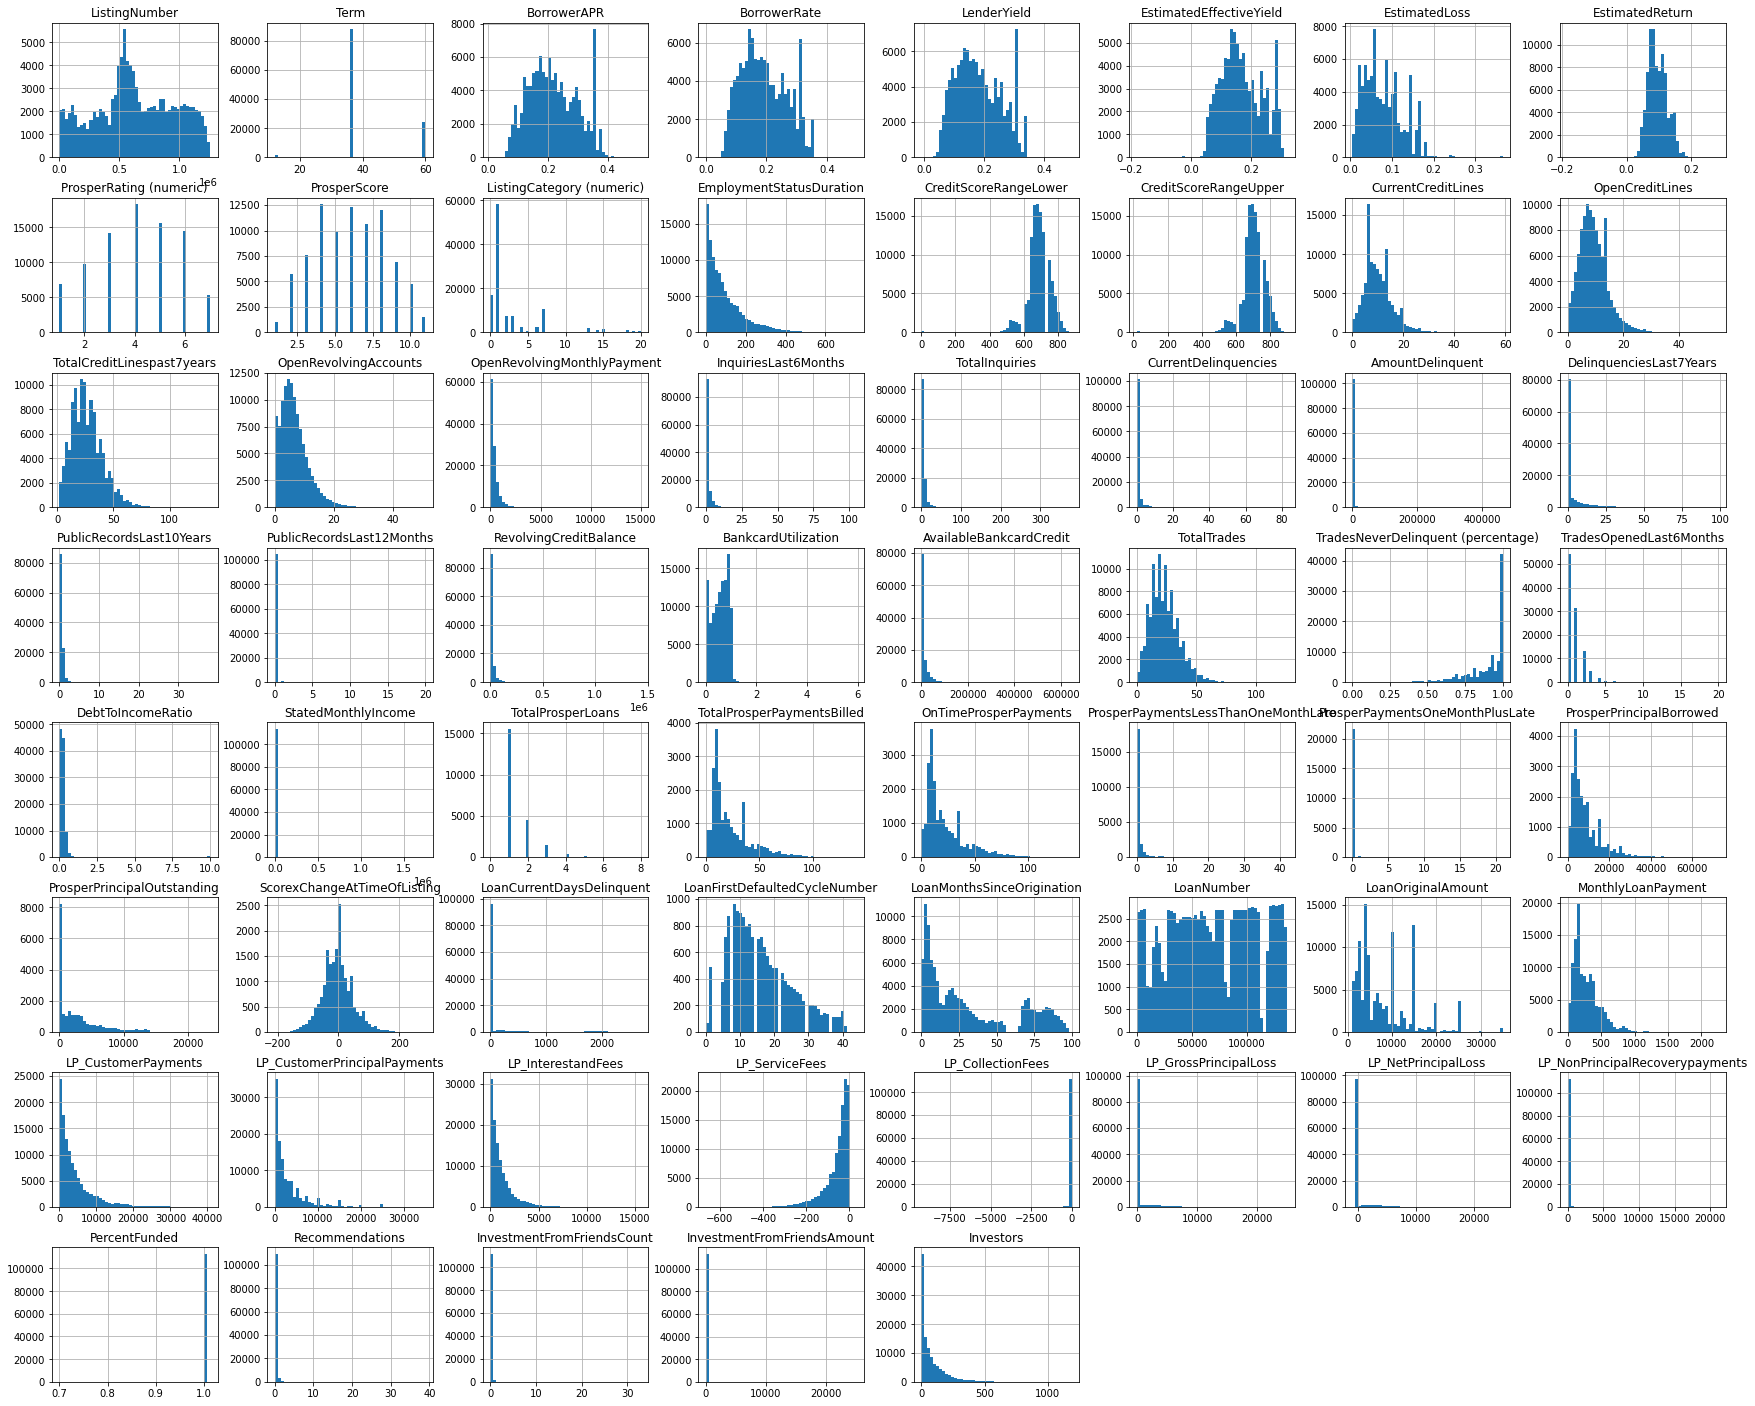

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


prosper.hist(bins=50, figsize=(30,25))

plt.show()

In [6]:
prosper = prosper.drop_duplicates()

In [7]:
prosper.corr()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.319971,-0.031520,-0.114391,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,...,0.208286,0.104191,-0.251739,-0.247716,-0.096004,0.014688,-0.126031,-0.092813,-0.053481,-0.279659
Term,0.319971,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,...,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.031520,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,...,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,-0.114391,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,...,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,-0.113544,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,...,0.097854,-0.052954,0.099506,0.099195,0.041025,-0.029209,-0.031069,-0.037302,-0.026632,-0.274174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PercentFunded,0.014688,-0.028806,-0.028236,-0.029025,-0.029209,-0.043366,-0.022738,-0.039422,0.012491,-0.019344,...,0.069591,0.006186,-0.013144,-0.013578,0.000776,1.000000,0.009604,0.001622,0.003338,-0.049716
Recommendations,-0.126031,-0.056680,-0.044236,-0.030579,-0.031069,-0.046694,0.004081,-0.019886,0.004772,0.026658,...,-0.039016,-0.015910,0.041372,0.040897,0.016845,0.009604,1.000000,0.718079,0.322062,0.073824
InvestmentFromFriendsCount,-0.092813,-0.043507,-0.046757,-0.037312,-0.037302,-0.063848,0.009475,-0.043022,0.007746,0.028343,...,-0.035004,-0.008319,0.020932,0.020350,0.010109,0.001622,0.718079,1.000000,0.483506,0.058773
InvestmentFromFriendsAmount,-0.053481,-0.024472,-0.031841,-0.026512,-0.026632,-0.038146,0.024555,-0.031902,-0.010459,0.003131,...,-0.056675,-0.010141,0.028762,0.028301,0.018604,0.003338,0.322062,0.483506,1.000000,0.012178


In [8]:
prosper.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [9]:
prosper.replace("FinalPaymentInProgress","Completed",inplace=True)

In [10]:
prosper.replace("Chargedoff","Defaulted",inplace=True)

In [11]:
prosper = prosper[prosper["LoanStatus"] != "Current"]

In [12]:
prosper = prosper[(prosper.LoanStatus == "Defaulted") | (prosper.LoanStatus == "Completed")]\
    .drop(columns=("LP_CustomerPayments"))
prosper

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.00,0.00,0.00,1.0,0,0,0.0,258
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.00,0.00,0.00,1.0,0,0,0.0,41
11,0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640000000,C,36,Completed,2008-01-07 00:00:00,0.15033,0.1325,0.1225,...,-0.88,0.0,0.00,0.00,0.00,1.0,0,0,0.0,53
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,NaN,36,Defaulted,2012-12-19 00:00:00,0.35797,0.3177,0.3077,...,-9.81,0.0,3790.25,3790.25,0.00,1.0,0,0,0.0,10
17,0FDF336575182398852A8DC,31540,2006-08-15 12:21:09.433000000,AA,36,Defaulted,2008-05-22 00:00:00,0.13202,0.1250,0.1175,...,-54.61,0.0,6012.65,6012.67,268.96,1.0,0,0,0.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113927,E3433419834735803891976,322787,2008-04-30 21:25:19.670000000,AA,36,Completed,2011-05-09 00:00:00,0.07469,0.0679,0.0579,...,-68.47,0.0,0.00,0.00,0.00,1.0,2,0,0.0,194
113928,E34935176664905343E01EA,510097,2011-06-06 19:02:44.443000000,NaN,36,Completed,2011-09-19 00:00:00,0.22362,0.1899,0.1799,...,-4.41,0.0,0.00,0.00,0.00,1.0,0,0,0.0,25
113929,E3553583161337791FCB87F,830413,2013-07-06 17:40:01.657000000,NaN,36,Completed,2014-02-07 00:00:00,0.30285,0.2639,0.2539,...,-6.54,0.0,0.00,0.00,0.00,1.0,0,0,0.0,26
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,Completed,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.00,0.00,0.00,1.0,0,0,0.0,22


In [13]:
prosper.groupby("LoanStatus").count()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
LoanStatus,,,,,,,,,,,,,,,,,,,,,
Completed,38279,38279,38279,18288,38279,38074,38254,38279,38279,19869,...,38279,38279,38279,38279,38279,38279,38279,38279,38279,38279
Defaulted,17010,17010,17010,10660,17010,17010,17010,17010,17010,6341,...,17010,17010,17010,17010,17010,17010,17010,17010,17010,17010


Feature 0: 130.128869
Feature 1: 535.735425
Feature 2: 472.012391
Feature 3: 444.377537
Feature 4: 16.740478
Feature 5: 321.418340
Feature 6: 2.313215
Feature 7: 16.242507


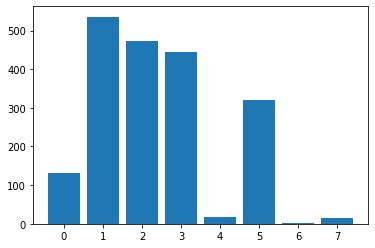

In [14]:
xx = prosper[['BorrowerState', 'ListingCategory (numeric)', 'Occupation','EmploymentStatus','IsBorrowerHomeowner',\
                                     'CurrentlyInGroup','IncomeVerifiable', 'IncomeRange']].values
yy = prosper[["LoanStatus"]].values

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

    # split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train.ravel(), y_test.ravel())

X_train_enc_u = np.nan_to_num(X_train_enc)
X_test_enc_u = np.nan_to_num(X_test_enc)
np.isnan(X_test_enc_u).any()

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc_u, y_train_enc, X_test_enc_u)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [15]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [16]:
numeric_features = list(prosper[['BorrowerAPR',\
                                 'BorrowerRate','LenderYield',\
                                 'CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines',\
                                 'OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts',\
                                 'BankcardUtilization', "TotalTrades",\
                                 'TotalProsperPaymentsBilled','OnTimeProsperPayments',\
                                 'ProsperPrincipalBorrowed',\
                                 'ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanMonthsSinceOrigination',\
                                 'LoanOriginalAmount','MonthlyLoanPayment','LP_CustomerPrincipalPayments',\
                                 'Investors']])

In [17]:
categorical_features = list(prosper[['ListingCategory (numeric)', 'Occupation','EmploymentStatus',\
                                     'CurrentlyInGroup']])

## Pipeline building

In [18]:
numeric_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(numeric_features)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_features)),
        ('cat_encoder', OneHotEncoder(sparse=False,
                                      handle_unknown='ignore')),
    ])



full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numeric_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])

from sklearn.compose import ColumnTransformer

full_pipeline2 = ColumnTransformer([
        ("num_pipeline", numeric_pipeline, numeric_features ),
        ("cat_pipeline", categorical_pipeline, categorical_features ),
    ])

In [19]:
train_set, test_set = train_test_split(prosper, test_size=0.33, random_state=42)

In [20]:
prosper_prepared = full_pipeline2.fit_transform(train_set)
len(prosper_prepared[1])

120

In [21]:
X_train = prosper_prepared

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)


In [22]:
test_prepared = full_pipeline2.fit_transform(test_set)

X_test = test_prepared

y_test = test_set[["LoanStatus"]].values.ravel()
y_test = (y_test == "Defaulted").astype(int)

In [23]:
len(prosper_prepared[1])

120

In [24]:
%%time
clf = LogisticRegressionCV(cv=5, random_state=42, max_iter=1000).fit(X_train, y_train)

CPU times: user 5min 5s, sys: 1min 9s, total: 6min 15s
Wall time: 1min 27s


In [25]:
clf.score(X_train, y_train)

0.9792943336122885

In [26]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25627
           1       0.99      0.94      0.97     11416

    accuracy                           0.98     37043
   macro avg       0.98      0.97      0.98     37043
weighted avg       0.98      0.98      0.98     37043



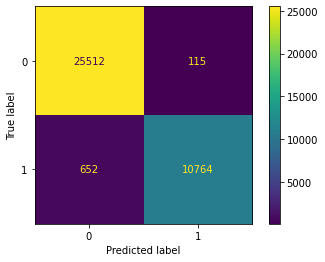

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Findings
Our model gives us around 600 to 700 false nagative predictions which means loans that were defaulted but was predicted as completed. This can be improvde a lot. 
We would like to see fewer false negatives since that what cost the company a lot of losses.

In [28]:
feature_names = np.array(numeric_features).view() 

In [29]:
def get_feature_names():  
        
        column_transformer = full_pipeline2 
        
        new_feature_names = np.insert(feature_names,0,'')

        for i, transformer_item in enumerate(column_transformer.transformers_):
            
            transformer_name, transformer, orig_feature_names = transformer_item
            orig_feature_names = list(orig_feature_names)
                
            if isinstance(transformer, Pipeline):
                # if pipeline, get the last transformer in the Pipeline
                transformer = transformer.steps[-1][1]

            if hasattr(transformer, 'get_feature_names'):

                if 'input_features' in transformer.get_feature_names.__code__.co_varnames:
                    names = list(transformer.get_feature_names(orig_feature_names))
                else:
                    names = list(transformer.get_feature_names())
                new_feature_names= np.append(new_feature_names,names)
                
        return new_feature_names

In [30]:
column_name = get_feature_names()

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## let's find the best hyperparameter for our model

In [31]:
log_reg = LogisticRegression(penalty='l1',solver="liblinear", random_state=42)

param_grid = [
    {'C': [0.001, 0.01, 0.1, 1]},
  ]

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best alpha value is: ", grid_search.best_params_)

Best alpha value is:  {'C': 1}


Classification report: 
 
                precision    recall  f1-score   support

           0       0.97      1.00      0.99     25627
           1       0.99      0.94      0.97     11416

    accuracy                           0.98     37043
   macro avg       0.98      0.97      0.98     37043
weighted avg       0.98      0.98      0.98     37043



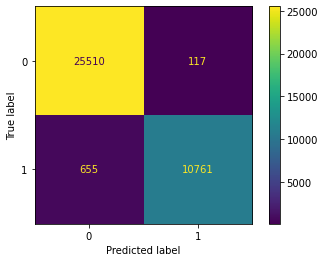

In [32]:
lg_reg = grid_search.best_estimator_

y_pred = lg_reg.predict(X_train)


cm = confusion_matrix(y_train, y_pred, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_reg.classes_)
disp.plot()

print("Classification report: \n \n ", classification_report(y_train, y_pred, zero_division=0))
plt.show()

## Results:
Unfortunately, this did not help the model. 


Feature: BorrowerAPR, Score: 1.04228
Feature: BorrowerRate, Score: -0.36267
Feature: LenderYield, Score: -0.19106
Feature: CreditScoreRangeLower, Score: 0.00000
Feature: CreditScoreRangeUpper, Score: -0.13233
Feature: CurrentCreditLines, Score: 0.08903
Feature: OpenCreditLines, Score: 0.01041
Feature: TotalCreditLinespast7years, Score: 0.10318
Feature: OpenRevolvingAccounts, Score: -0.10550
Feature: BankcardUtilization, Score: -0.01724
Feature: TotalTrades, Score: -0.09958
Feature: TotalProsperPaymentsBilled, Score: 0.39311
Feature: OnTimeProsperPayments, Score: -0.26794
Feature: ProsperPrincipalBorrowed, Score: -0.30896
Feature: ProsperPrincipalOutstanding, Score: 0.04964
Feature: ScorexChangeAtTimeOfListing, Score: -0.03913
Feature: LoanMonthsSinceOrigination, Score: 1.58487
Feature: LoanOriginalAmount, Score: 16.39925
Feature: MonthlyLoanPayment, Score: 0.90216
Feature: LP_CustomerPrincipalPayments, Score: -18.38258
Feature: Investors, Score: 0.67690
Feature: x0_0, Score: -0.19490
F

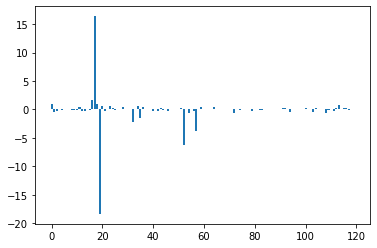

In [33]:
from matplotlib import pyplot
importance = lg_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (column_name[i+1],v))
        
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Now we want to see which features are important and weed out those that aren't

In [34]:
features = pd.DataFrame({'features': column_name[2:] , 'importance': list(importance)}, columns=['features', 'importance'])
## Negative importance coefficient also should be taken in consideration since it is somehow correlated negatively with the possibility of a user to apply for term deposit so :
features["importance"]= np.abs(features["importance"])
features = features.sort_values(by=['importance'], ascending=False)
features
Unimportante_features = features[features["importance"]==0]["features"].array
len(Unimportante_features)


46

In [35]:
for j in Unimportante_features:
    for i in numeric_features:
        if i == j:
            numeric_features.remove(i)

In [36]:
for j in Unimportante_features:
    for i in categorical_features:
        if i == j:
            categorical_features.remove(i)

In [37]:
len(numeric_features)

20

In [38]:
len(categorical_features)

4

In [39]:
len(X_train[1])

120

In [40]:
numeric_features1 = list(prosper[['BorrowerAPR',\
                                 'BorrowerRate','LenderYield',\
                                 'CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines',\
                                 'OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts',\
                                 'BankcardUtilization', "TotalTrades",\
                                 'TotalProsperPaymentsBilled','OnTimeProsperPayments',\
                                 'ProsperPrincipalBorrowed',\
                                 'ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanMonthsSinceOrigination',\
                                 'LoanOriginalAmount','MonthlyLoanPayment',\
                                 'Investors']])

In [45]:
numeric_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(numeric_features1)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_features)),
        ('cat_encoder', OneHotEncoder(sparse=False,
                                      handle_unknown='ignore')),
    ])



full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numeric_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])

from sklearn.compose import ColumnTransformer

full_pipeline2 = ColumnTransformer([
        ("num_pipeline", numeric_pipeline, numeric_features1 ),
        ("cat_pipeline", categorical_pipeline, categorical_features ),
    ])

In [46]:
train_set, test_set = train_test_split(prosper, test_size=0.33, random_state=42)

In [47]:
prosper_prepared = full_pipeline2.fit_transform(train_set)
len(prosper_prepared[1])

119

In [48]:
X_train = prosper_prepared

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)

In [49]:
test_prepared = full_pipeline2.fit_transform(test_set)

X_test = test_prepared

y_test = test_set[["LoanStatus"]].values.ravel()
y_test = (y_test == "Defaulted").astype(int)

In [50]:
%%time
clf = LogisticRegressionCV(cv=5, random_state=42, max_iter=1000).fit(X_train, y_train)

CPU times: user 4min 22s, sys: 1min 4s, total: 5min 26s
Wall time: 1min 27s


In [51]:
clf.score(X_train, y_train)

0.7287746672785681

## Findings:


## We create the pipeline and only use the important features

In [40]:
numeric_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(numeric_features)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_features)),
        ('cat_encoder', OneHotEncoder(sparse=False,
                                      handle_unknown='ignore')),
    ])



full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numeric_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])

from sklearn.compose import ColumnTransformer

full_pipeline2 = ColumnTransformer([
        ("num_pipeline", numeric_pipeline, numeric_features ),
        ("cat_pipeline", categorical_pipeline, categorical_features ),
    ])

In [41]:
prosper_prepared = full_pipeline2.fit_transform(train_set)
X_train = prosper_prepared

In [42]:
len(X_train[1])

119

In [43]:
%%time
y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)


clf = LogisticRegressionCV(cv=5, random_state=42, max_iter=5000).fit(X_train, y_train)
clf.score(X_train, y_train)

CPU times: user 5min 6s, sys: 50.5 s, total: 5min 56s
Wall time: 1min 5s


0.9792943336122885

In [44]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25627
           1       0.99      0.94      0.97     11416

    accuracy                           0.98     37043
   macro avg       0.98      0.97      0.98     37043
weighted avg       0.98      0.98      0.98     37043



In [45]:
len(X_train[1])

119

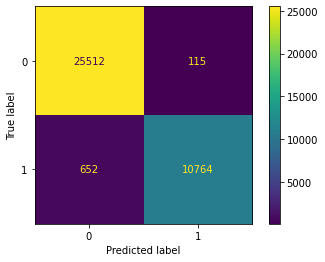

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [47]:
column_name = get_feature_names()

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Now we want to find the best hyperparameter with the new chosen features

In [48]:
log_reg = LogisticRegression(penalty='l1',solver="liblinear", random_state=42, max_iter= 5000)

param_grid = [
    {'C': [0.001, 0.01, 0.1, 1]},
  ]

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best alpha value is: ", grid_search.best_params_)

Best alpha value is:  {'C': 1}


In [49]:
len(X_train[1])

119

Classification report: 
 
                precision    recall  f1-score   support

           0       1.00      0.98      0.99     26164
           1       0.94      0.99      0.97     10879

    accuracy                           0.98     37043
   macro avg       0.97      0.98      0.98     37043
weighted avg       0.98      0.98      0.98     37043



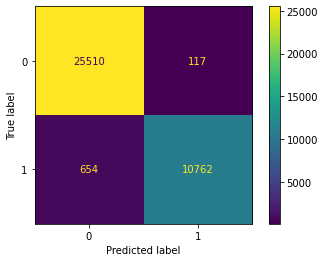

In [50]:
lg_reg = grid_search.best_estimator_

y_pred = lg_reg.predict(X_train)


cm = confusion_matrix(y_train, y_pred, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_reg.classes_)
disp.plot()

print("Classification report: \n \n ", classification_report(y_pred, y_train))
plt.show()

## Findings:
The model result still did not change a lot. 


Feature: BorrowerAPR, Score: 1.02734
Feature: BorrowerRate, Score: -0.30184
Feature: LenderYield, Score: -0.23749
Feature: CreditScoreRangeLower, Score: -0.13181
Feature: CreditScoreRangeUpper, Score: 0.08890
Feature: CurrentCreditLines, Score: 0.01044
Feature: OpenCreditLines, Score: 0.10325
Feature: TotalCreditLinespast7years, Score: -0.10541
Feature: OpenRevolvingAccounts, Score: -0.01714
Feature: BankcardUtilization, Score: -0.09950
Feature: TotalTrades, Score: 0.39321
Feature: TotalProsperPaymentsBilled, Score: -0.26800
Feature: OnTimeProsperPayments, Score: -0.30888
Feature: ProsperPrincipalBorrowed, Score: 0.04954
Feature: ProsperPrincipalOutstanding, Score: -0.03942
Feature: ScorexChangeAtTimeOfListing, Score: 1.58067
Feature: LoanMonthsSinceOrigination, Score: 16.39119
Feature: LoanOriginalAmount, Score: 0.90433
Feature: MonthlyLoanPayment, Score: -18.37716
Feature: LP_CustomerPrincipalPayments, Score: 0.67640
Feature: Investors, Score: -0.12218
Feature: x0_0, Score: 0.07200
F

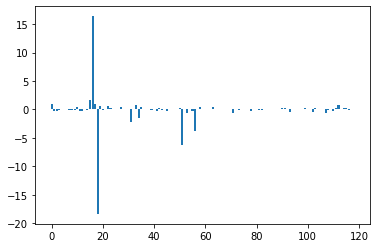

In [51]:
from matplotlib import pyplot
importance = lg_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (column_name[i+1],v))
        
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Here we want to see how both the Precision and the Recall change depending on which threshold we use

119


(0.0, 1.0)

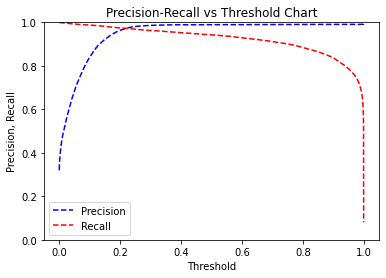

In [52]:
### Predict test_y values and probabilities based on fitted logistic regression model
from sklearn import metrics
predTest = lg_reg.predict(X_train)
print(len(X_train[1]))

probs_y=lg_reg.predict_proba(X_train) 
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_train, probs_y[:, 1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

## Interpretation

With the increase of the threshold, the precision score will increase untill almost reach 1 but at the same time the recall score which our main focus will decrease so we find ourself in a tradeoff situation.

## ROC curve

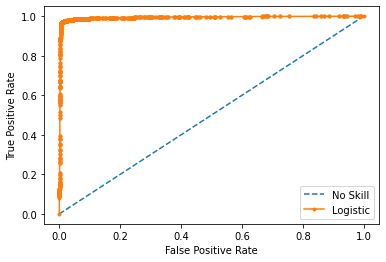

In [53]:
# roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# predict probabilities
yhat =lg_reg.predict_proba(X_train) 
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

##Running the example fits a logistic regression model on the training dataset 
##Then evaluates it using a range of thresholds on the test set, creating the ROC Curve

## Findings

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance wich is the case for our model.

#### From the ROC curve we choose the best Threshold


In [54]:
from numpy import * 
yhat = lg_reg.predict_proba(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold= %f' % (best_thresh))

Best Threshold= 0.232341


In [55]:
len(X_train[1])

119

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, classification_report
THRESHOLD = best_thresh
preds = np.where(lg_reg.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

In [57]:
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25627
           1       0.98      0.97      0.97     11416

    accuracy                           0.98     37043
   macro avg       0.98      0.98      0.98     37043
weighted avg       0.98      0.98      0.98     37043



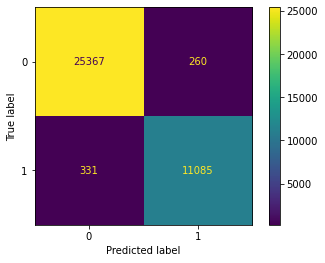

In [58]:
CM = confusion_matrix(y_train, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

##  Results:
Here we see an improvement. We have decrease our main evaluation criteria: False Negatives.
That means that fewer people are defaulting that we did not predict that would default. We are still predicting a lot of clients to default that would not default

# Testing the model using the test dataset


We use fit_transform() on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data.

In [59]:
bank_prepared2 = full_pipeline2.transform(test_set)
bank_prepared2.shape

(18246, 119)

In [60]:
bank_prepared2test = full_pipeline2.fit_transform(test_set)
bank_prepared2test.shape

(18246, 120)

In [61]:
column_name1 = get_feature_names()

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Remarque: 
One of the features was included in the train test but not in the test set so we had to remove it when testing since the model is trained only on 119 features

In [62]:
Missing_value  = ""
for i in range(len(column_name1)):
    if column_name1[i] not in column_name:
        print(column_name1[i])
        Missing_value = column_name1[i]
        

x1_Judge


In [63]:
col_name = np.asarray(column_name1)
#col_name.index(Missing_value)
pos = np.where(col_name == Missing_value)[0][0]

In [64]:
rows = bank_prepared2test.shape[0]

In [65]:
bank_list = bank_prepared2test.tolist()

In [66]:
bank_prepared2test.shape

(18246, 120)

In [67]:
bank_prepared2test
for i in range(rows):
    bank_list[i].pop(pos)

In [68]:
np.array(bank_list).shape

(18246, 119)

In [69]:
## testing with logistic regression
#bank_prepared2 = full_pipeline2.fit_transform(test_set)

X_test = bank_list
y_test = test_set[["LoanStatus"]].values.ravel()
y_test = (y_test == "Defaulted").astype(int)
predTest = lg_reg.predict(X_test)



In [70]:
lg_reg.score(X_test, y_test)

0.9772552888304286

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     12963
           1       0.94      0.99      0.96      5283

    accuracy                           0.98     18246
   macro avg       0.97      0.98      0.97     18246
weighted avg       0.98      0.98      0.98     18246



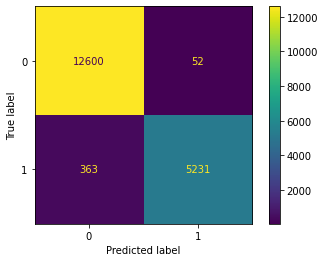

In [71]:
print(classification_report(predTest, y_test))
CM = confusion_matrix(y_test, predTest, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

###### Results:
Our model performs well on the test set. The model predictions are good, but could be better.

#### Now we change the threshold for the model

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12713
           1       0.97      0.98      0.97      5533

    accuracy                           0.98     18246
   macro avg       0.98      0.98      0.98     18246
weighted avg       0.98      0.98      0.98     18246



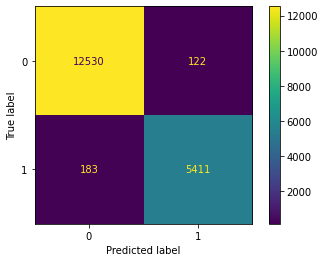

In [72]:
#### after changing the threshold with the test set
preds = np.where(lg_reg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print(classification_report(preds, y_test))
CM = confusion_matrix(y_test, preds, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

## Findings:
By changing the threshold our model performs even better. We see very few false negatives.

# Random forest model

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
%%time
rf = RandomForestClassifier(max_depth=2, n_estimators=10, random_state= 42)
rf.fit(X_train,y_train)

CPU times: user 256 ms, sys: 24.4 ms, total: 281 ms
Wall time: 147 ms


RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

#### We use the ROC curve to find the best threshold

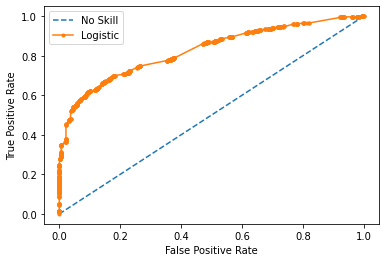

New threshold :  0.31425868750234603




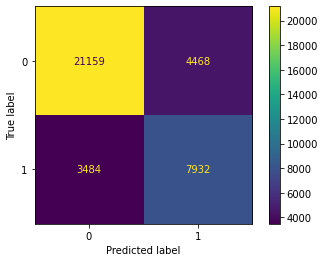

In [75]:
from numpy import * 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, classification_report

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)
y_pred= rf.predict(X_train)

yhat = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
THRESHOLD1 = best_thresh
print("New threshold : ", THRESHOLD1)
print("\n")
preds = np.where(rf.predict_proba(X_train)[:,1] > THRESHOLD1, 1, 0)
CM = confusion_matrix(y_train, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=rf.classes_)
disp.plot()
plt.show()

## Findings:
The random forest model is not performing better than the logistic regression model. We can see a lot of false negatives predictions also a lot of false positives.

## Precision-recall ve threshold: Precision Vs Recall score

(0.0, 1.0)

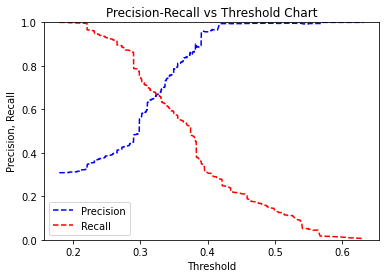

In [76]:
from sklearn import metrics
predTest = rf.predict(X_train)

probs_y= rf.predict_proba(X_train) 
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_train, probs_y[:, 1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [77]:
from numpy import * 
yhat = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold= %f' % (best_thresh))

Best Threshold= 0.314259


In [78]:
THRESHOLD1 = best_thresh
preds = np.where(rf.predict_proba(X_train)[:,1] > THRESHOLD1, 1, 0)

In [79]:
print("Classification report: \n \n ", classification_report(y_train, preds ,zero_division=0 ))

Classification report: 
 
                precision    recall  f1-score   support

           0       0.86      0.83      0.84     25627
           1       0.64      0.69      0.67     11416

    accuracy                           0.79     37043
   macro avg       0.75      0.76      0.75     37043
weighted avg       0.79      0.79      0.79     37043



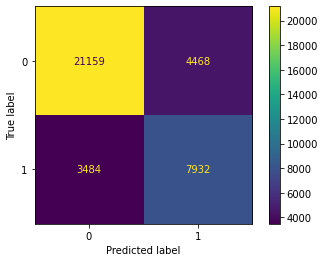

In [80]:
CM = confusion_matrix(y_train, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=rf.classes_)
disp.plot()
plt.show()

## Findings:
Changing the threshold did not improve the random forest model performance.

## Testing with random forest

              precision    recall  f1-score   support

           0       0.99      0.72      0.83     17445
           1       0.13      0.88      0.22       801

    accuracy                           0.73     18246
   macro avg       0.56      0.80      0.53     18246
weighted avg       0.95      0.73      0.81     18246



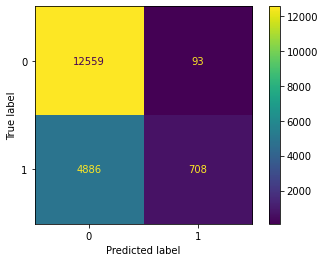

In [81]:
bank_prepared2 = full_pipeline2.fit_transform(test_set)

X_test = bank_list
y_test = test_set[["LoanStatus"]].values.ravel()
y_test = (y_test == "Defaulted").astype(int)
predTest = rf.predict(X_test)

print(classification_report(predTest, y_test,zero_division=0))
CM = confusion_matrix(y_test, predTest, labels=lg_reg.classes_, )
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

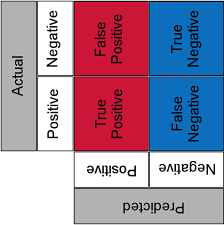

In [82]:
from IPython import display
display.Image("./download.png")

## Results:
0: completed
1: defaulted

The predictions are poor. the model is prediction a lot of false negative so, in this case, this model is not efficient.


## Trying principal component analysis PCA for dimentionality reduction

Large number of features in the dataset is one of the factors that affect both the training time as well as accuracy of machine learning models. You have different options to deal with huge number of features in a dataset, in this case we tried to extract the most important features from the dataset that are responsible for maximum variance in the output. Different statistical techniques are used for this purpose and one of them was principal component analysis.

### Advantages of PCA

There are two main advantages of dimensionality reduction with PCA.

The training time of the algorithms reduces significantly with less number of features.

It is not always possible to analyze data in high dimensions. 

PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set. To do this, execute the following code:

In [83]:
train_set, test_set = train_test_split(prosper, test_size=0.33, random_state=42)

prosper_prepared = full_pipeline2.fit_transform(train_set)

X_train = prosper_prepared

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)


X_test = bank_list
y_test = test_set[["LoanStatus"]].values.ravel()
y_test = (y_test == "Defaulted").astype(int)


In [84]:
X_train.shape

(37043, 119)

In [85]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(37043, 119)

# Implementing log_reg with PCA

In [86]:
%%time
clf = LogisticRegressionCV(cv=5, random_state=42, max_iter=5000).fit(X_train, y_train)
clf.score(X_train, y_train)

CPU times: user 4min 46s, sys: 47.4 s, total: 5min 33s
Wall time: 46.3 s


0.9792943336122885

In [87]:
X_train.shape

(37043, 119)

## Findings: 
Same result as log_reg becase the number of features was the same, let's try to choose the right number of feature using the elbow method

In [88]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

22

In [89]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

(37043, 22)

In [90]:
%%time
clf.fit(X_reduced, y_train)
clf.score(X_reduced, y_train)

CPU times: user 12.3 s, sys: 2.99 s, total: 15.3 s
Wall time: 2.11 s


0.956483006235996

## Findings:
Reducing the number of features on the logistic regression model with PCA decreases the score
Next step: Let's try it on different model: Random forest classification

## Implementing RandomForestClassification with PCA
In this case we will use random forest classification for making the predictions.

Source: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

In [91]:
train_set, test_set = train_test_split(prosper, test_size=0.33, random_state=42)

prosper_prepared = full_pipeline2.fit_transform(train_set)

X_train = prosper_prepared

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)


X_test = bank_list
y_test = test_set[["LoanStatus"]].values.ravel()
y_test = (y_test == "Defaulted").astype(int)

In [92]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(37043, 119)

In [93]:
from sklearn.ensemble import RandomForestClassifier


In [94]:
%%time
classifier = RandomForestClassifier(max_depth=2, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

CPU times: user 8.39 s, sys: 301 ms, total: 8.69 s
Wall time: 7.72 s


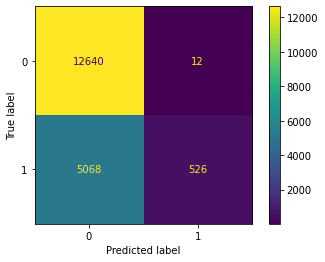

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



CM = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels= classifier.classes_)
disp.plot()
plt.show()



## Findings:

Using PCA with random forest classifier gave us a good result for false positive (predicted defaulted but the loan was completed) while the false negative is high (predicted completed but the loan was defaulted) which is our focus. how can we improve our model ??

### Choosing the Right Number of Dimensions

In [96]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d


22

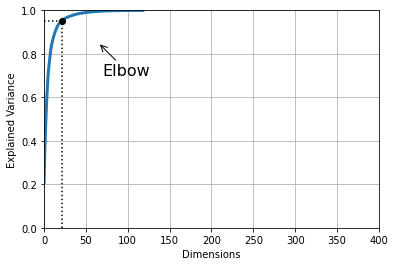

In [97]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [98]:
%%time
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

CPU times: user 7.21 s, sys: 1.67 s, total: 8.88 s
Wall time: 1.3 s


(37043, 22)

In [99]:
classifier.fit(X_reduced, y_train)

# Predicting the Test set results
X_test_reduced = pca.fit_transform(X_test)
print(X_test_reduced.shape)


(18246, 22)


In [100]:
y_pred = classifier.predict(X_test_reduced)

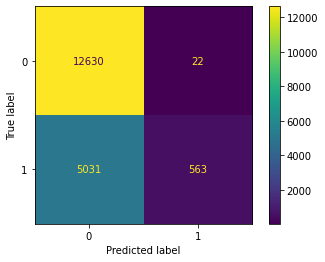

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

CM = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels= classifier.classes_)
disp.plot()
plt.show()

## Findings:

The model improved a bit, but the logistic regression model is still unbeatable.

## Keras Deep Learning model 

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping

Source: https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

In [103]:
prosper_prepared = full_pipeline2.fit_transform(prosper)

X = prosper_prepared
y = prosper[["LoanStatus"]].values.ravel()
y = (y == "Defaulted").astype(int)


In [104]:
X.shape

(55289, 120)

In [105]:
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [106]:
X_train_all.shape

(37043, 120)

In [107]:
X_valid, X_train = X_train_all[:4000], X_train_all[4000:] 
y_valid, y_train = y_train_all[:4000], y_train_all[4000:] 

In [108]:
%%time
# create model
model = Sequential()
model.add(Dense(120, input_dim=120, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=30, batch_size=10, callbacks=[es])

2022-05-11 18:32:35.713291: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
3305/3305 [==============================] - 4s 1ms/step - loss: 0.1371 - recall: 0.8903 - val_loss: 0.0988 - val_recall: 0.9084
Epoch 2/30
3305/3305 [==============================] - 4s 1ms/step - loss: 0.0831 - recall: 0.9412 - val_loss: 0.1140 - val_recall: 0.8743
Epoch 3/30
3305/3305 [==============================] - 4s 1ms/step - loss: 0.0731 - recall: 0.9499 - val_loss: 0.0760 - val_recall: 0.9434
Epoch 4/30
3305/3305 [==============================] - 4s 1ms/step - loss: 0.0642 - recall: 0.9567 - val_loss: 0.0693 - val_recall: 0.9559
Epoch 5/30
3305/3305 [==============================] - 4s 1ms/step - loss: 0.0611 - recall: 0.9581 - val_loss: 0.0786 - val_recall: 0.9425
Epoch 6/30
3305/3305 [==============================] - 4s 1ms/step - loss: 0.0573 - recall: 0.9597 - val_loss: 0.0821 - val_recall: 0.9409
Epoch 7/30
3305/3305 [==============================] - 4s 1ms/step - loss: 0.0512 - recall: 0.9646 - val_loss: 0.0656 - val_recall: 0.9592
Epoch 8/30
3305/3305

## Findings:


Our model composed of 5 layers starting with 120 as input dimention untill finishing by just one node, we are using relu and sigmoid in the last layer. Also, we are using early stoping that minimise the loss value and we set patience to 3 so that if the value did not change for 3 consecutive epochs, the model stop running. Adding to that, we are using adam as optimizer. the model reach a recall score of 0.96 which is almost the same score as logitic regression model's score.

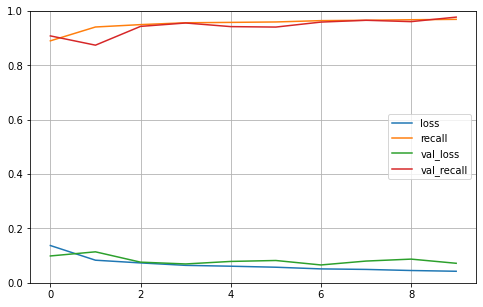

In [109]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [110]:
model.evaluate(X_test, y_test)

571/571 [==============================] - 1s 996us/step - loss: 0.0718 - recall: 0.9768


[0.0717788115143776, 0.9767608046531677]

## Testing the model

In [111]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.03],
       [0.01],
       [0.01],
       [0.02],
       [1.  ]], dtype=float32)

In [112]:
y_new = y_test[:10]
y_new

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1])